**Uploading CSV file**

In [15]:
from google.colab import files


uploaded = files.upload()


Saving Real estate.csv to Real estate.csv


In [39]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Real estate.csv']))
print(df)


      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

**1.Importing the required Libraries**

In [40]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Confirmation message
"Libraries successfully imported."


'Libraries successfully imported.'

**2.Reading our Dataset**

In [41]:
# Re-reading the dataset
real_estate_data = pd.read_csv('/content/Real estate.csv')

# Displaying the first few rows of the dataset for a quick review
real_estate_data.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


**3.Visualizing the Data using HeatMap**

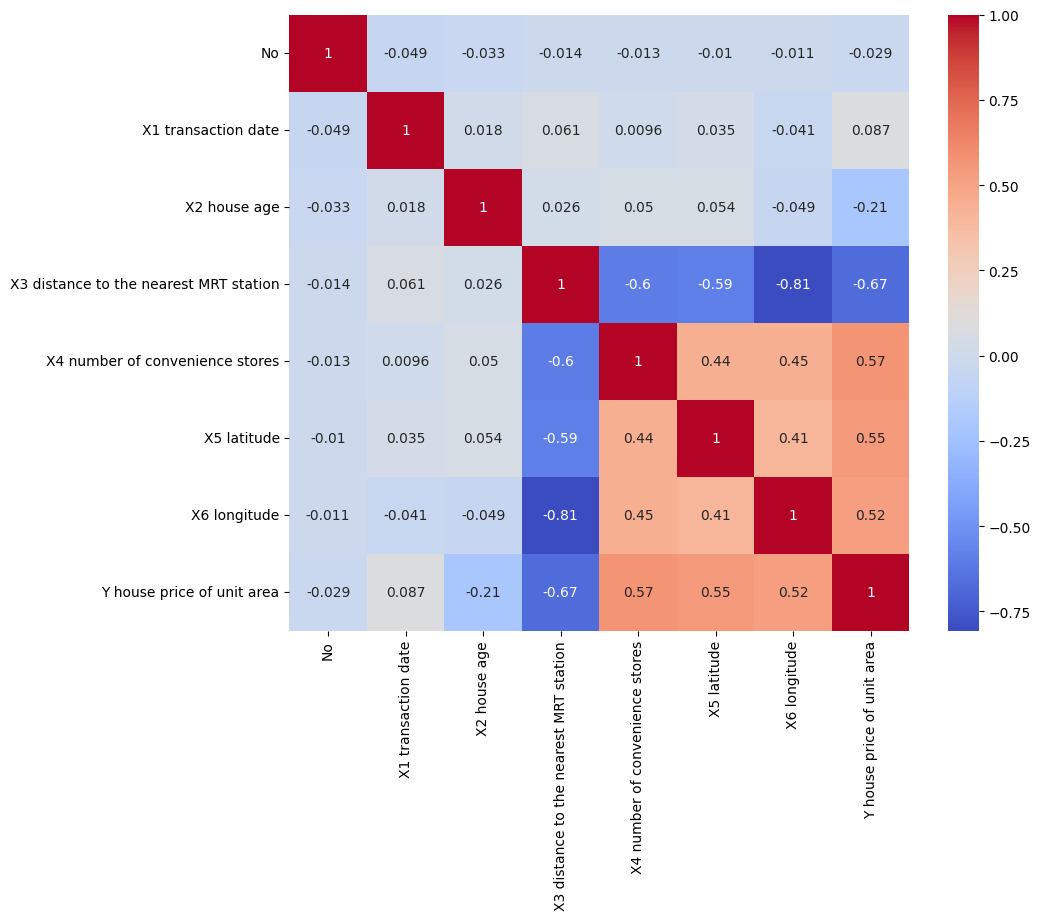

In [49]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(real_estate_data.corr(), annot=True, cmap='coolwarm')
plt.show()


**4.Checking the correlations in the dataset**

In [50]:
# Checking correlations
correlations = real_estate_data.corr()
print(correlations)


                                              No  X1 transaction date  \
No                                      1.000000            -0.048658   
X1 transaction date                    -0.048658             1.000000   
X2 house age                           -0.032808             0.017549   
X3 distance to the nearest MRT station -0.013573             0.060880   
X4 number of convenience stores        -0.012699             0.009635   
X5 latitude                            -0.010110             0.035058   
X6 longitude                           -0.011059            -0.041082   
Y house price of unit area             -0.028587             0.087491   

                                        X2 house age  \
No                                         -0.032808   
X1 transaction date                         0.017549   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of convenience stores             0.049593   
X5 lat

**5.Feature Making**

In [51]:
# Selecting the independent variables (features) and the dependent variable (target)
X = real_estate_data[['X2 house age', 'X3 distance to the nearest MRT station',
                      'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = real_estate_data['Y house price of unit area']

# Confirmation message
"Features and target variable are successfully prepared."


'Features and target variable are successfully prepared.'

**6.Train test splitting**

In [45]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirmation message
"Data has been split into training and testing sets."


'Data has been split into training and testing sets.'

**7.Generating the model and train regression model**

In [46]:
# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Confirmation message
"Linear regression model has been successfully created and trained."


'Linear regression model has been successfully created and trained.'

**8.Checking Coefficients, Intercept, R-Squared Value**

In [47]:
# Recreating the linear regression model and training it (as previous state was lost)
model = LinearRegression()
model.fit(X_train, y_train)

# Extracting the coefficients and intercept from the model again
coefficients = model.coef_
intercept = model.intercept_

# Predicting on the training set and recalculating the R-squared value
y_train_pred = model.predict(X_train)
r_squared_train = r2_score(y_train, y_train_pred)

coefficients, intercept, r_squared_train


(array([-2.70593236e-01, -4.55249601e-03,  1.10512079e+00,  2.36092831e+02,
        -2.39036942e+01]),
 -2946.6588590244446,
 0.5457883393347673)

**9.Evaluating the model and give a proper view of performance**

In [48]:
# Predicting on the test set
y_test_pred = model.predict(X_test)

# Recalculating the R-squared value and Mean Squared Error for the test data
r_squared_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r_squared_test, mse_test


(0.6746481382828156, 54.58094520086248)